In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
df1=pd.read_csv('./mtcars.csv')
df1.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
#Dataset Attributes
df1 = df1.drop('model',axis=1)
df1.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [13]:
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
mtcars2 = pp.ProfileReport(df1)
mtcars2.to_file('mtcars.html')
display(IFrame('mtcars.html', width=900, height=350))

In [4]:
#Create Standard Model

#Define x and y variable
x = df1.drop('mpg',axis=1).values
y = df1['mpg'].values

#Train dataset using 20% test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

x_2 = sc.fit_transform(x)

#Prepare Models - Linear, Lasso, Ridge and Elastic-net 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
alpha=0.5

In [5]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lm = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearRegression())])
pipeline.insert(0,pipe_lm)

pipe_lasso= Pipeline([('scl', StandardScaler()),
                     ('clf', Lasso(alpha=alpha,random_state=100))])
pipeline.insert(1,pipe_lasso)

pipe_ridge= Pipeline([('scl', StandardScaler()),
                     ('clf', Ridge(alpha=alpha,random_state=100))])
pipeline.insert(2,pipe_ridge)

pipe_elas= Pipeline([('scl', StandardScaler()),
                     ('clf', ElasticNet(alpha=alpha,random_state=100))])
pipeline.insert(3,pipe_elas)

# Set grid search params 

modelpara =[]

param_gridlm = {'clf__fit_intercept':[True,False],
             'clf__normalize':[True,False], 
             'clf__copy_X':[True, False]}
modelpara.insert(0,param_gridlm)

param_gridlasso = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20]}
modelpara.insert(1,param_gridlasso)

param_gridridge = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20]}
modelpara.insert(2,param_gridridge)

param_gridelas = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20]}
modelpara.insert(3,param_gridelas)

In [6]:
# Create Learning Curves

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train, 
                                                            y=y_train,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring = 'neg_mean_squared_error',
                                                            cv=10,
                                                            n_jobs=1,random_state=100)
    
    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='best')
    plt.ylim([-1,20])
    plt.show()

Leaning Curve - LM


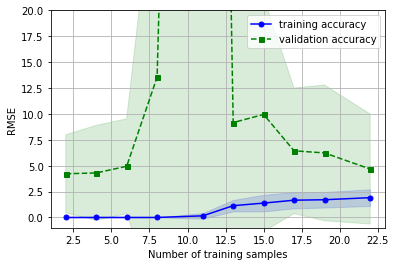

Leaning Curve - Lasso


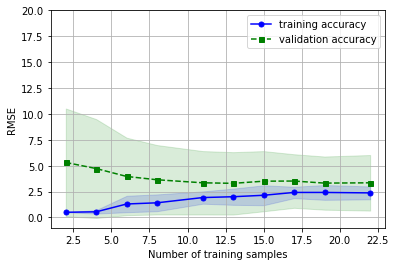

Leaning Curve - Ridge


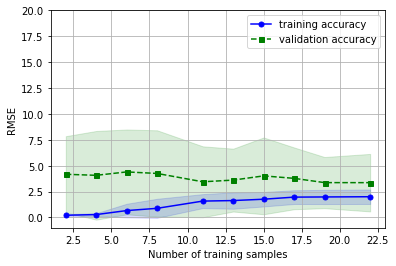

Leaning Curve - ElasticNet


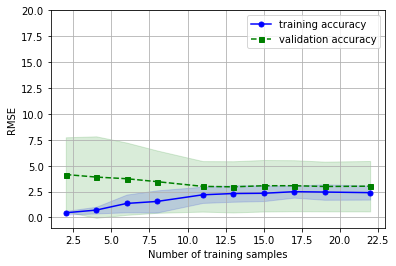

In [7]:
#Plot Learning Curve

print('Leaning Curve - LM')
plot_learning_curves(pipe_lm)
print('Leaning Curve - Lasso')
plot_learning_curves(pipe_lasso)
print('Leaning Curve - Ridge')
plot_learning_curves(pipe_ridge)
print('Leaning Curve - ElasticNet')
plot_learning_curves(pipe_elas)

Model Evaluation - RMSE Score
LinearRegression 3.67
Lasso 2.99
Ridge 3.32
ElasticNet 2.86




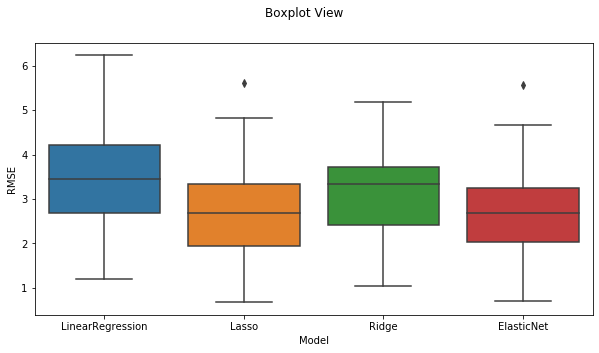

In [8]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('LinearRegression',pipe_lm))
models.append(('Lasso',pipe_lasso))
models.append(('Ridge',pipe_ridge))
models.append(('ElasticNet',pipe_elas))
  
#Model Evaluation
results =[]
names=[]
scoring ='neg_mean_squared_error'
print('Model Evaluation - RMSE Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(np.sqrt(-cv_results))
    names.append(name)
    print('{} {:.2f}'.format(name,np.sqrt(-cv_results.mean())))
print('\n')

#Boxplot View
fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

In [9]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, n_jobs=-1, cv=cv2,scoring='neg_mean_squared_error')
    gs_clf = gs_clf.fit(x_train, y_train)
    model = gs_clf.best_estimator_
    
    #Nested CV
    scoresNested = cross_val_score(gs_clf, x_2, y, 
                             scoring='neg_mean_squared_error', cv=5,
                             n_jobs= -1)    
      
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
   
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    print('\nBest Parameters:',bestpara)
    
    #Test data accuracy of model with best params    
    print('\nIntercept: {:.2f}'.format(float(gs_clf.best_estimator_.named_steps['clf'].intercept_)))
    coeff_table=pd.DataFrame(np.transpose(gs_clf.best_estimator_.named_steps['clf'].coef_),
                             df1.drop('mpg',axis=1).columns,
                              columns=['Coefficients'])
    print('\n')
    print(coeff_table)
    
    #Print R2
    print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test,y_pred)))
    
    #Print MSE and RMSE
    print('\nNestedCV MSE:  {:0.2f}'.format(np.mean(-scoresNested)))
    print('NestedCV RMSE:  {:0.2f}'.format(np.sqrt(np.mean(-scoresNested))))  

In [10]:
#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Optimized Model

Model Name: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Best Parameters: {'clf__copy_X': True, 'clf__fit_intercept': True, 'clf__normalize': True}

Intercept: 19.87


      Coefficients
cyl       1.938951
disp      1.080770
hp       -0.310827
drat      1.321747
wt       -2.459684
qsec      1.461972
vs       -0.067494
am        0.888064
gear      2.599937
carb     -3.069300

R2: 0.30

NestedCV MSE:  16.17
NestedCV RMSE:  4.02


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Optimized Model

Model Name: Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=100,
      selection='cyclic', tol=0.0001, warm_start=False)

Best Parameters: {'clf__alpha': 0.1}

Intercept: 19.87


      Coefficients
cyl      -0.000000
disp     -0.000000
hp       -0.031562
drat      0.496466
wt       -1.793213
qsec      0.569635
vs        0.000000
am        0.730378
gear      1.749960
carb     -2.470508

R2: 0.64

NestedCV MSE:  10.81
NestedCV RMSE:  3.29


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Optimized Model

Model Name: Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=100, solver='auto', tol=0.001)

Best Parameters: {'clf__alpha': 10}

Intercept: 19.87


      Coefficients
cyl      -0.471602
disp     -0.549667
hp       -0.698351
drat      0.381400
wt       -1.247020
qsec      0.322720
vs        0.308110
am        0.899480
gear      0.693384
carb     -1.151499

R2: 0.85

NestedCV MSE:  9.59
NestedCV RMSE:  3.10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Optimized Model

Model Name: ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=100, selection='cyclic', tol=0.0001, warm_start=False)

Best Parameters: {'clf__alpha': 0.1}

Intercept: 19.87


      Coefficients
cyl      -0.000000
disp     -0.000000
hp       -0.475375
drat      0.462120
wt       -1.821222
qsec      0.626437
vs        0.000000
am        0.921380
gear      1.396805
carb     -1.945963

R2: 0.73

NestedCV MSE:  10.22
NestedCV RMSE:  3.20


LinearRegression

Permutation Importance




Weight,Feature
0.4508 ± 0.3814,wt
0.4125 ± 1.2226,carb
0.4075 ± 0.7474,gear
0.2909 ± 0.2349,qsec
0.1016 ± 0.3149,drat
0.0651 ± 0.0989,hp
0.0017 ± 0.0057,vs
-0.0273 ± 0.1643,am
-0.0283 ± 0.4021,cyl
-0.1100 ± 0.1513,disp


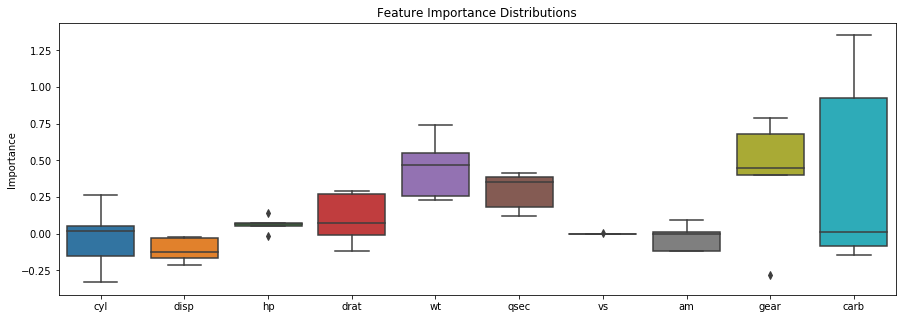

Lasso

Permutation Importance




Weight,Feature
0.2789 ± 0.3165,wt
0.0976 ± 0.0596,cyl
0.0741 ± 0.1148,hp
0.0350 ± 0.0763,carb
0.0075 ± 0.0461,am
0.0064 ± 0.0334,gear
0.0050 ± 0.0100,qsec
0 ± 0.0000,vs
0 ± 0.0000,drat
0 ± 0.0000,disp


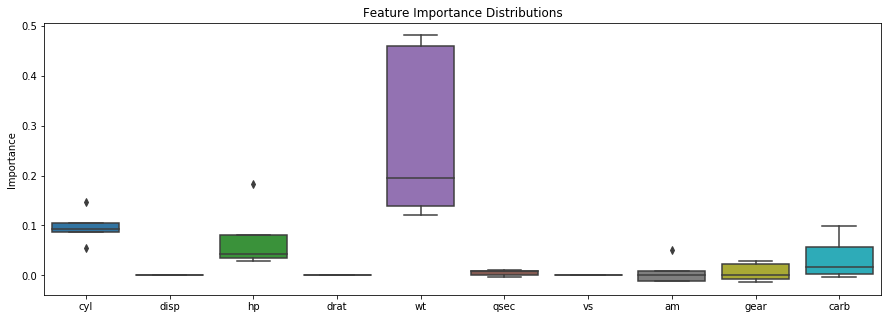

Ridge

Permutation Importance




Weight,Feature
0.3189 ± 0.2882,wt
0.2905 ± 0.7848,carb
0.2426 ± 0.4343,gear
0.1626 ± 0.1458,qsec
0.0691 ± 0.1055,hp
0.0488 ± 0.1547,drat
0.0013 ± 0.0072,vs
-0.0096 ± 0.1322,am
-0.0429 ± 0.1506,cyl
-0.0530 ± 0.0635,disp


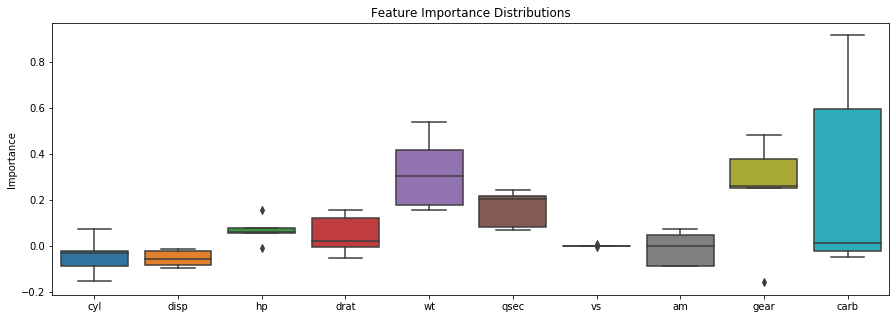

ElasticNet

Permutation Importance




Weight,Feature
0.1302 ± 0.1457,wt
0.0663 ± 0.1042,hp
0.0639 ± 0.1396,carb
0.0547 ± 0.0465,disp
0.0506 ± 0.0332,cyl
0.0287 ± 0.0546,gear
0.0275 ± 0.0884,am
0.0156 ± 0.0235,drat
0.0068 ± 0.0157,qsec
0.0028 ± 0.0160,vs


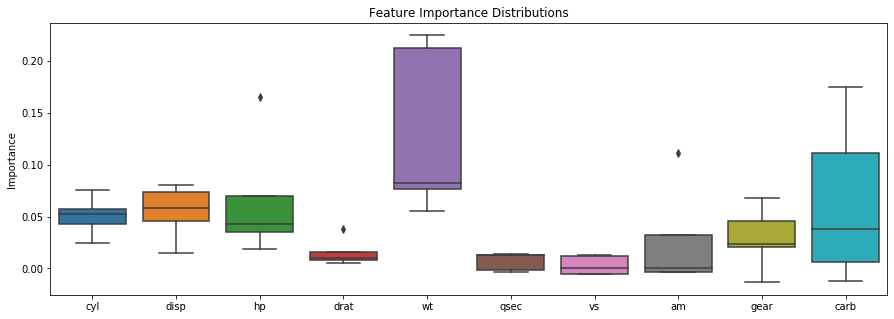

In [11]:
#Feature Importance
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display

for name, model in models:
    print(name)
    perm=PermutationImportance(model.fit(x_train2,y_train),random_state=100).fit(x_test2,y_test)
    features=df1.drop('mpg',axis=1).columns
    print('\nPermutation Importance')
    print('\n')
    df=eli5.show_weights(perm,feature_names=df1.drop('mpg',axis=1).columns.tolist())
    display(df)
    df2= pd.DataFrame(data=perm.results_,columns=features)
    fig = plt.figure(figsize=(15,5))
    sns.boxplot(data=df2).set(title='Feature Importance Distributions',
                             ylabel='Importance')
    plt.show()